In [26]:
import scipy.io # To use the '.mat' files
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
for root, dirs, files in os.walk("0hp_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

0hp_load_48_KHz\14_BA.mat
0hp_load_48_KHz\14_IR.mat
0hp_load_48_KHz\14_OR1.mat
0hp_load_48_KHz\21_BA.mat
0hp_load_48_KHz\21_IR.mat
0hp_load_48_KHz\21_OR1.mat
0hp_load_48_KHz\21_OR2.mat
0hp_load_48_KHz\21_OR3.mat
0hp_load_48_KHz\7_BA.mat
0hp_load_48_KHz\7_IR.mat
0hp_load_48_KHz\7_OR1.mat
0hp_load_48_KHz\7_OR2.mat
0hp_load_48_KHz\7_OR3.mat
0hp_load_48_KHz\N.mat


In [3]:
path = r'0hp_load_48_KHz\7_OR3.mat'
mat = scipy.io.loadmat(path)

In [4]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 12:25:53 2000'), ('__version__', '1.0'), ('__globals__', []), ('X161_DE_time', array([[0.328152  ],
       [0.24011631],
       [0.15333231],
       ...,
       [0.16146831],
       [0.235944  ],
       [0.20027077]])), ('X161_FE_time', array([[-0.05156909],
       [ 0.00308182],
       [ 0.07273091],
       ...,
       [ 0.08362   ],
       [ 0.03472182],
       [ 0.05033636]])), ('X161RPM', array([[1796]], dtype=uint16))])

In [5]:
list(mat.keys())

['__header__',
 '__version__',
 '__globals__',
 'X161_DE_time',
 'X161_FE_time',
 'X161RPM']

In [6]:
key_name = list(mat.keys())[3]

In [7]:
DE_data = mat.get(key_name)
DE_data

array([[0.328152  ],
       [0.24011631],
       [0.15333231],
       ...,
       [0.16146831],
       [0.235944  ],
       [0.20027077]])

In [8]:
file_name

'N.mat'

In [9]:
fault = np.full((len(DE_data), 1), file_name[:-4])

In [10]:
df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})

In [19]:
df_temp

,DE_data,fault
0,0.053197,N
1,0.088662,N
2,0.099718,N
3,0.058621,N
4,-0.004590,N
...,...,...
243933,-0.059664,N
243934,-0.063836,N
243935,-0.034630,N
243936,0.016689,N


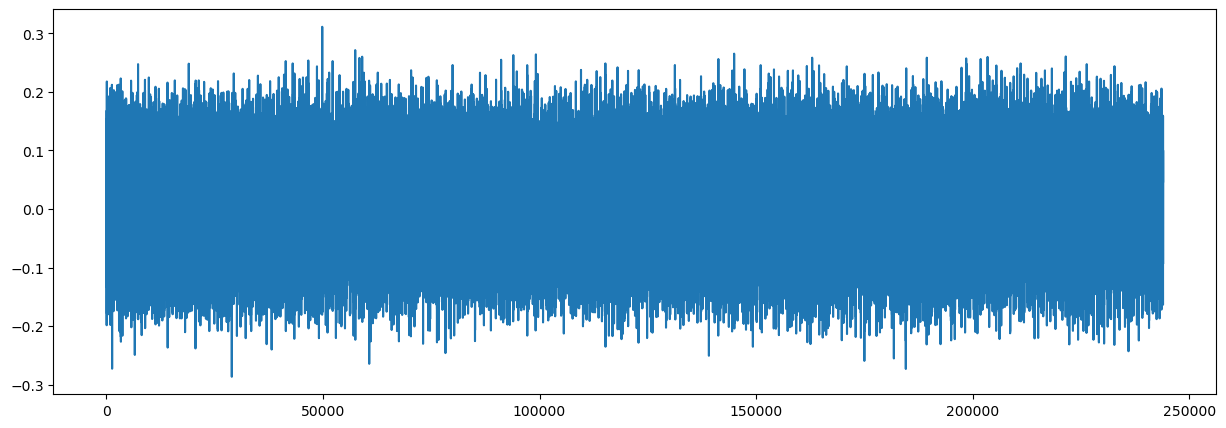

In [20]:
plt.figure(figsize=(15,5))
plt.plot(df_temp.iloc[:,0])
plt.show()

In [21]:
df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("0hp_load_48_KHz", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        key_name = list(mat.keys())[3]
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('0hp_all_faults.csv',index=False)     

0hp_load_48_KHz\14_BA.mat
['14_BA']
0hp_load_48_KHz\14_IR.mat
['14_BA' '14_IR']
0hp_load_48_KHz\14_OR1.mat


C:\Users\Barat\AppData\Local\Temp\ipykernel_16460\202185131.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp],axis=0)


['14_BA' '14_IR' '14_OR1']
0hp_load_48_KHz\21_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA']
0hp_load_48_KHz\21_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR']
0hp_load_48_KHz\21_OR1.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1']
0hp_load_48_KHz\21_OR2.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2']
0hp_load_48_KHz\21_OR3.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3']
0hp_load_48_KHz\7_BA.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA']
0hp_load_48_KHz\7_IR.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR']
0hp_load_48_KHz\7_OR1.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR' '7_OR1']
0hp_load_48_KHz\7_OR2.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR' '7_OR1' '7_OR2']
0hp_load_48_KHz\7_OR3.mat
['14_BA' '14_IR' '14_OR1' '21_BA' '21_IR' '21_OR1' '21_OR2' '21_OR3'
 '7_BA' '7_IR' '7_OR1' '7

In [22]:
df = pd.read_csv('0hp_all_faults.csv')

In [15]:
df

,DE_data,fault
0,0.039846,14_BA
1,0.089705,14_BA
2,0.136643,14_BA
3,0.177532,14_BA
4,0.205903,14_BA
...,...,...
2782624,-0.059664,N
2782625,-0.063836,N
2782626,-0.034630,N
2782627,0.016689,N


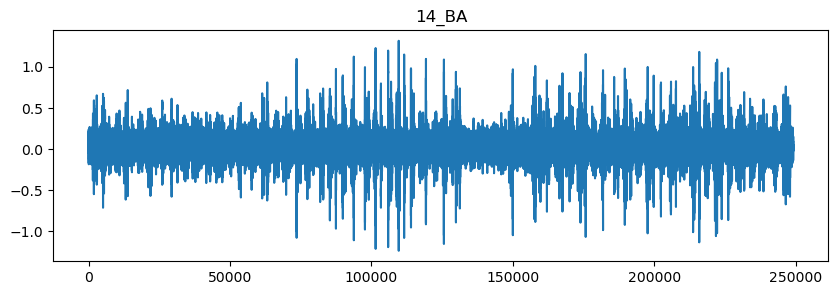

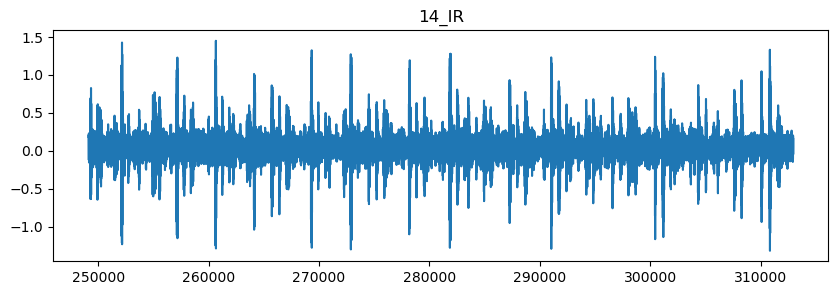

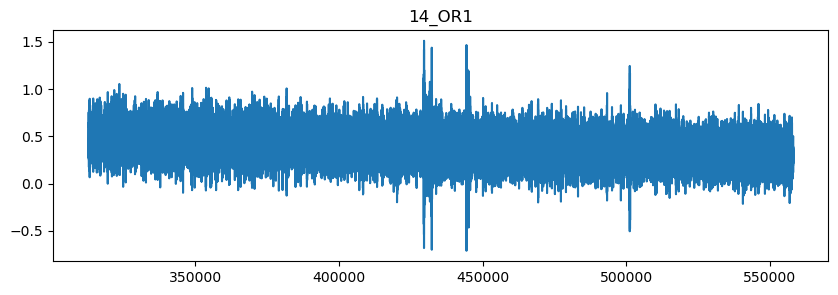

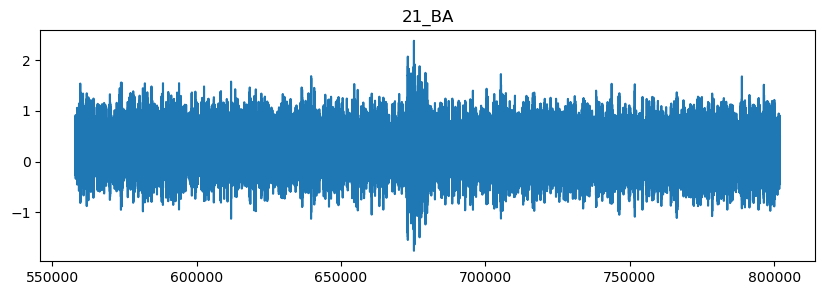

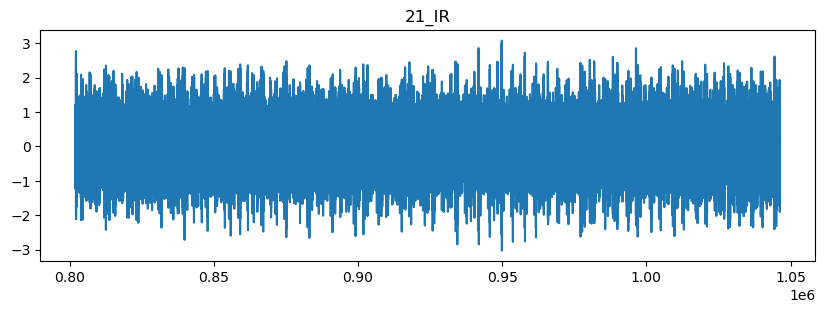

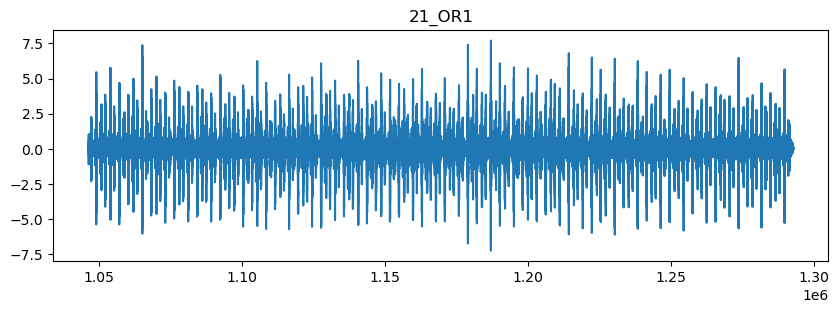

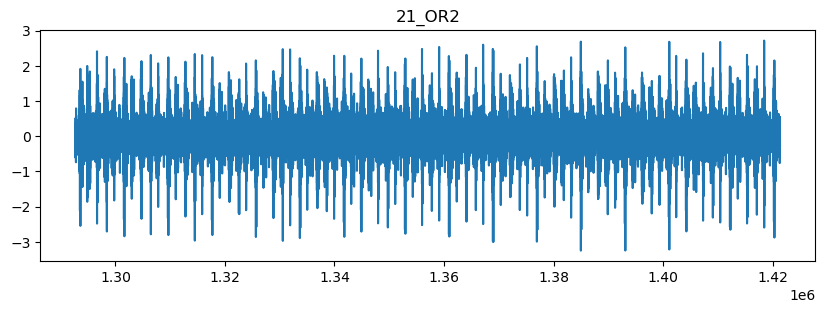

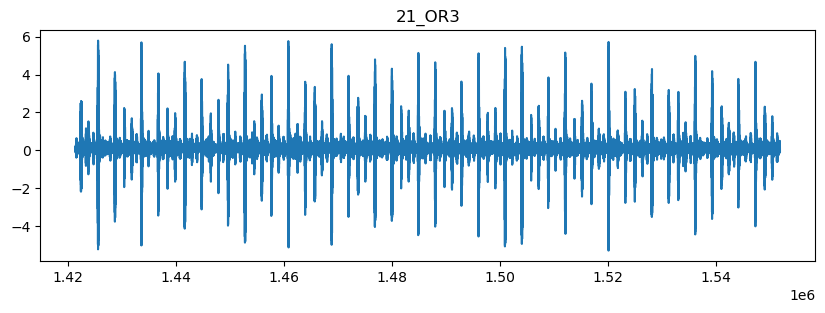

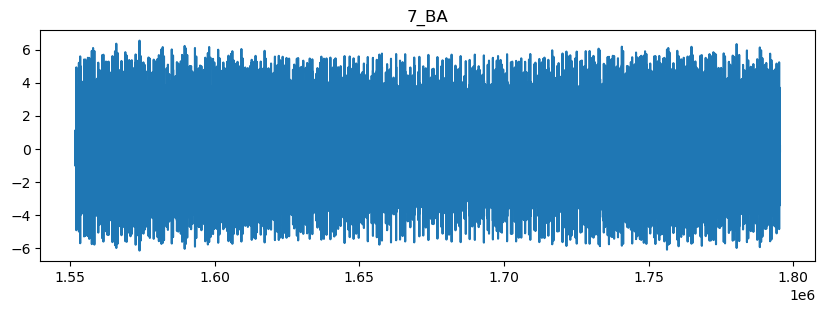

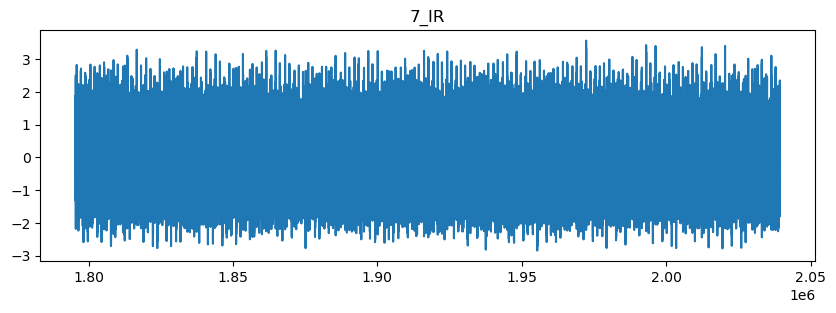

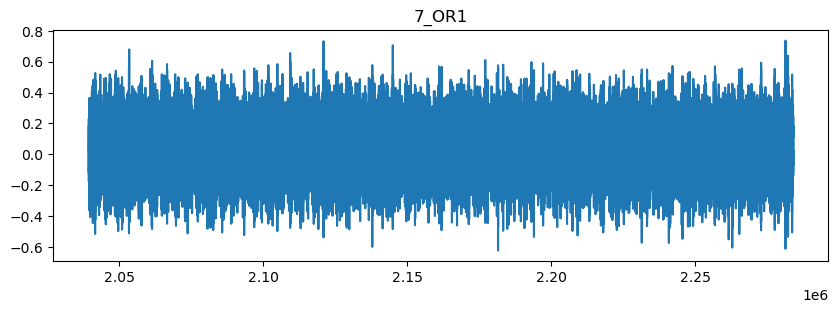

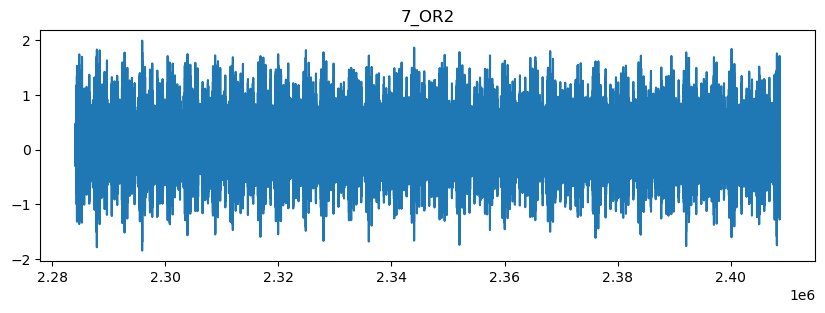

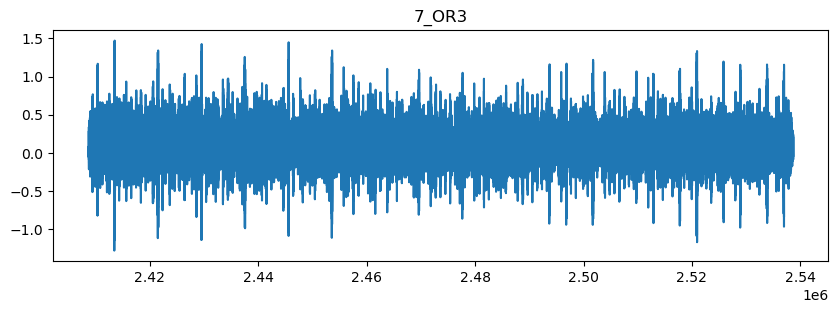

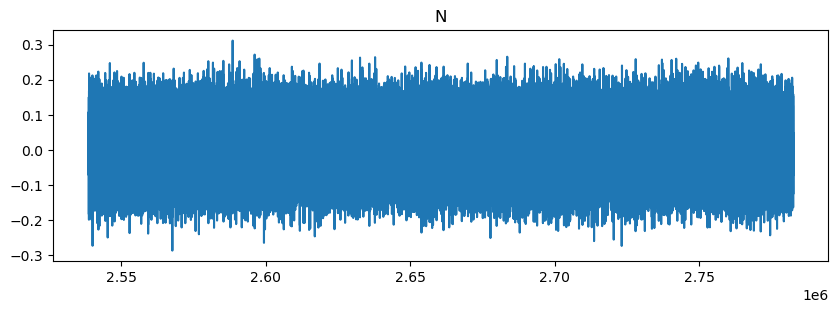

In [23]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

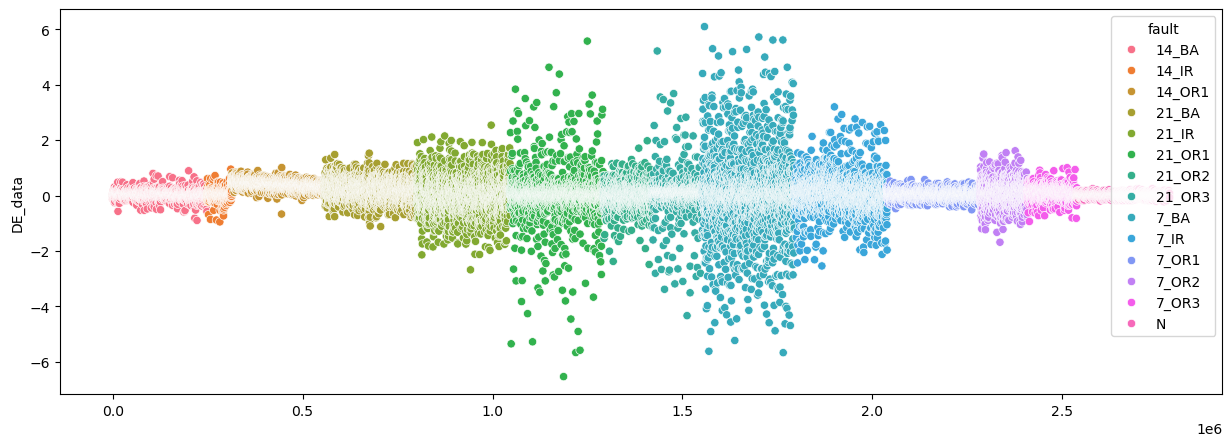

In [24]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df.iloc[::100,:],y='DE_data',x=np.arange(0,len(df),100),hue='fault')
plt.show()

In [25]:
load=3

df=pd.DataFrame(columns=['DE_data','fault'])

for root, dirs, files in os.walk("{}hp_load_48_KHz".format(load), topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        mat = scipy.io.loadmat(path)

        for k in list(mat.keys()):
            if k[5:]== 'DE_time':
                key_name=k
        DE_data = mat.get(key_name)
        fault = np.full((len(DE_data), 1), file_name[:-4])

        df_temp = pd.DataFrame({'DE_data':np.ravel(DE_data) , 'fault':np.ravel(fault)})
        
        df = pd.concat([df,df_temp],axis=0)
        print(df['fault'].unique())
        
df.to_csv('{}hp_all_faults.csv'.format(load),index=False)   